In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv')
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,3:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,3:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
2,3,2019-01-01,3:09,Tuesday,DUPONT STATION,EUATC,6,11,N,YU,5381,ATC RC&S Equipment,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
3,4,2019-01-01,3:26,Tuesday,ST CLAIR WEST STATION,EUATC,4,9,N,YU,5571,ATC RC&S Equipment,43.683888,-79.415113,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
4,5,2019-01-01,8:04,Tuesday,DAVISVILLE STATION,MUNOA,5,10,S,YU,0,No Operator Immediately Available - Not E.S.A....,43.697778,-79.397222,Yonge University Spadina,January,5-9AM,1,8,2019


In [24]:
df.columns

Index(['id', 'date', 'time', 'day', 'station', 'code', 'min_delay', 'min_gap',
       'bound', 'line', 'vehicle', 'code_info', 'latitude', 'longitude',
       'line_name', 'month', 'time_range', 'month_number', 'hour', 'year'],
      dtype='object')

In [25]:
df = df.loc[df["station"]=="SHEPPARD WEST STATION"]
df.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
13,14,2019-01-01,8:44,Tuesday,SHEPPARD WEST STATION,TUNIP,4,9,N,YU,5436,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,5-9AM,1,8,2019
23,24,2019-01-02,6:18,Wednesday,SHEPPARD WEST STATION,EUDO,4,12,N,YU,5456,Door Problems - Faulty Equipment,43.749444,-79.461944,Yonge University Spadina,January,5-9AM,1,6,2019
80,82,2019-01-05,14:39,Saturday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,5551,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,12-3PM,1,14,2019
98,100,2019-01-07,11:51,Monday,SHEPPARD WEST STATION,TUNIP,3,6,N,YU,5931,Operator Not In Position,43.749444,-79.461944,Yonge University Spadina,January,9AM-12PM,1,11,2019
102,104,2019-01-07,16:17,Monday,SHEPPARD WEST STATION,MUIR,5,7,S,YU,6101,Injured or ill Customer (On Train) - Medical A...,43.749444,-79.461944,Yonge University Spadina,January,3-6PM,1,16,2019


In [26]:
#df_selected = df[["station","bound","line","month_number","hour","year"]]
#df_selected = df[["station","bound","day","hour"]]
#df_selected = df[["station","bound","month_number","hour","year","day_number"]]
#df_selected = df[["station","month_number","hour"]]
df_selected = df[["code","day","month_number","hour"]]
df_selected.head()

,code,day,month_number,hour
13,TUNIP,Tuesday,1,8
23,EUDO,Wednesday,1,6
80,TUNIP,Saturday,1,14
98,TUNIP,Monday,1,11
102,MUIR,Monday,1,16


In [27]:
df_selected.dtypes

code            object
day             object
month_number     int64
hour             int64
dtype: object

In [28]:
df_selected['hour'] = df_selected['hour'].astype(str)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_selected.dtypes

code            object
day             object
month_number     int64
hour            object
dtype: object

In [30]:
# Assign the data to X and y

X_NoEncoded = df_selected
y = df["min_delay"].values.reshape(-1, 1)
print(X_NoEncoded.shape, y.shape)

(650, 4) (650, 1)


GET DUMMIES ALL

In [31]:
X = pd.get_dummies(X_NoEncoded)
X.head()

,month_number,code_EUAC,code_EUATC,code_EUBK,code_EUBO,code_EUCD,code_EUDO,code_EUECD,code_EULV,code_EUME,...,hour_2,hour_20,hour_21,hour_22,hour_23,hour_5,hour_6,hour_7,hour_8,hour_9
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
80,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, y_train.shape)

(487, 95) (487, 1)


StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [34]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [35]:
#--> FOR SCALED!!

# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3699596252543905
Testing Score: -9.186281780237671e+22


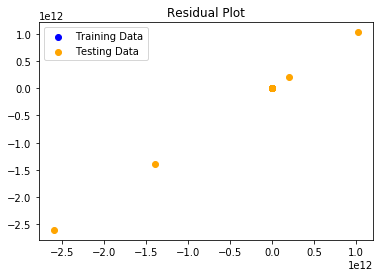

In [36]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [37]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.01763990037613e+22, R2: -9.186281780237671e+22
